# Week1-A: Adder in Quantum Circuits

Hi! Welcome to our lab. This week, we will start by learning how to perform simple additions using quantum circuits.<br/>

Just like in classical computation, where you can combine different logical gates (e.g., AND, OR, XOR, etc.) to create binary adders, you can make adders with quantum circuits as well.

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# If you run this code outside IBM Quantum Experience,
# run the following commands to store your API token locally.
# Please refer https://qiskit.org/documentation/install.html#access-ibm-quantum-systems
# IBMQ.save_account('MY_API_TOKEN')

# Loading your IBM Q account(s)
IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Half Adder
The half adder is used to add together the two least significant digits in a binary sum.
It has two single binary inputs, called A and B, and two outputs C (carry out) and S (sum).
The output C will be used as an input to the Full Adder, which will be explained later, for obtaining the value in the higher digit.

Half adders can be described with the truth table shown below.

|A (input)|B (input)|S (sum)|C (carry out)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

From the truth table, you should notice that the carry output, C, is a result of operating an AND gate against A and B, where the output S is a result of operating an XOR against A and B.
As we have already created the AND and XOR gates, we can combine these gates and create a half adder as follows.

We denote our quantum register as 'q', classical registers as 'c', assign inputs A and B to q[0] and q[1], the sum output S and  carry output C to q[2] and q[3].

{'00': 1000}


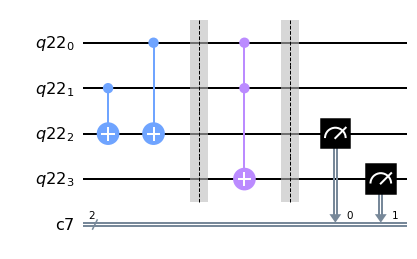

In [19]:
#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

# Learning Exercise I-A
The full adder takes two binary numbers plus an overflow bit, which we will call X, as its input.
Create a full adder with input data:

$A=1$, $B=0$, $X=1$
. 

The truth table for the full adder is given below.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

Call your quantum register 'q' and classical register 'c'. Assign inputs A, B and X to q[0], q[1] and q[2] respectively, the sum output S to c[0] and carry output C to c[1].

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

In [6]:
def qc_lesson(a, b, cin):
    # this uses the approach from the lesson...
    # scores 239

    ##### build your quantum circuit here
    q = QuantumRegister(5)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)

    if (a):
        qc.x(q[0])
    if (b):
        qc.x(q[1])
    if (cin):
        qc.x(q[2])

    qc.cx(q[0],q[3])
    qc.cx(q[1],q[3])
    qc.cx(q[2],q[3])
    qc.ccx(q[0],q[1],q[4])
    qc.ccx(q[0],q[2],q[4])
    qc.ccx(q[1],q[2],q[4])
    s = qc.measure(q[3],c[0])
    c = qc.measure(q[4],c[1])

    return qc

In [7]:
def qc_reddit(q0, q1, q2):
    # using approach from: https://www.reddit.com/r/QuantumComputing/comments/jr1gps/full_adder_in_qiskit/
    # score is 170... this is the one I've submitted.
    
    ##### build your quantum circuit here
    q = QuantumRegister(5)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    
    if (q0):
        qc.x(q[0])
    if (q1):
        qc.x(q[1])
    if (q2):
        qc.x(q[2])

    qc.rcx(q[1],q[3])
    qc.rx(q[0],q[3])
    qc.rccx(q[2],q[3],q[4])
    qc.rx(q[2],q[3])
    qc.rccx(q[0],q[1],q[4])
    qc.measure(q[3],c[0])
    qc.measure(q[4],c[1])
        
    return qc

In [30]:
def qc_pfag(q0, q1, q2):
    # Peres Full Adder Gate... # https://arxiv.org/ftp/arxiv/papers/1008/1008.3533.pdf
    # score is 172... dang, not as good as the previous one... seemed flaky too, probably due to the H gate
    # ... tried reducing to just the 4 qbits shown in the paper.
    
    ##### build your quantum circuit here
    q = QuantumRegister(4)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    
    # the PFAG approach uses controlled-V gates... see this link:
    # (https://qiskit.org/documentation/locale/ja/_modules/qiskit/aqua/circuits/gates/multi_control_toffoli_gate.html)
    # controlled-V
    #    qc.h(q[3])
    #    qc.cp(-angle, q[0], q[3])
    #    qc.h(q[3])
    # controlled-Vdag
    #    qc.h(q[3])
    #    qc.cp(angle, q[1], q[3])
    #    qc.h(q[3])
    pi = 3.14159265359
    angle = pi / 4

    # inputs...
    if (q0):
        qc.x(q[0])
    if (q1):
        qc.x(q[1])
    if (q2):
        qc.x(q[2])
    
    #qc.cv(q[1],q[3])
    qc.h(q[1])
    qc.cp(-angle, q[1], q[3])
    qc.h(q[1])
    #qc.cv(q[0],q[3])
    qc.h(q[0])
    qc.cp(-angle, q[0], q[3])
    qc.h(q[0])
    qc.cx(q[0],q[1])
    #qc.cvdag(q[1],q[3])
    qc.h(q[1])
    qc.cp(angle, q[1], q[3])
    qc.h(q[1])
    #qc.cv(q[2],q[3])
    qc.h(q[2])
    qc.cp(-angle, q[2], q[3])
    qc.h(q[2])
    #qc.cv(q[1],q[3])
    qc.h(q[1])
    qc.cp(-angle, q[1], q[3])
    qc.h(q[1])
    qc.cx(q[1],q[2])
    #qc.cvdag(q[2],q[3])
    qc.h(q[2])
    qc.cp(angle, q[2], q[3])
    qc.h(q[2])
    qc.measure(q[2],c[0])
    qc.measure(q[3],c[1])
    
    return qc

In [59]:
def qc_textbook(q0, q1, q2):
    # based on discussion on pg 132 of Quantum Computation and Quantum Information, Nielsen and Chuang
    # score is xxx... blah... on closer inspection, it's a pretty rudimentary diagram with quite a bit
    # going on were I to fully implement it... no way will it be better than the reddit solution.
    
    ##### build your quantum circuit here
    q = QuantumRegister(5)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    pi = 3.14159265359
    angle = pi / 4

    # inputs...
    if (q0):
        qc.x(q[0])
    if (q1):
        qc.x(q[1])
    if (q2):
        qc.x(q[2])
        
    qc.ccx(q[0], q[1], q[3])
    qc.ccx(q[1], q[2], q[4])
    qc.cx(q[3], q[4])

    qc.measure(q[3],c[0])
    qc.measure(q[4],c[1])

    return qc

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

def qc_reddit(q0, q1, q2):
    # using approach from: 
    # https://www.reddit.com/r/QuantumComputing/comments/jr1gps/full_adder_in_qiskit/
    # score was 170 before optimizations.
    # optimizations: rccx, and transpiling; got down to 104
    
    ##### build your quantum circuit here
    q = QuantumRegister(5)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    
    if (q0): qc.x(q[0])
    if (q1): qc.x(q[1])
    if (q2): qc.x(q[2])

    qc.cx(q[1],q[3])
    qc.cx(q[0],q[3])
    qc.rccx(q[2],q[3],q[4])
    qc.cx(q[2],q[3])
    qc.rccx(q[0],q[1],q[4])
    qc.measure(q[3],c[0])
    qc.measure(q[4],c[1])
    pass_ = Unroller(['u3', 'cx'])
    pm = PassManager(pass_)
    qc_reddit_unrolled = pm.run(qc)
    qc_reddit_opt = transpile(qc_reddit_unrolled,optimization_level=3)  # score = 104
    return qc

In [19]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit.compiler import transpile

from qc_grader import grade_ex1a
qc=qc_reddit(True,False,True)
grade_ex1a(qc)

Computing cost...
Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 104.
Feel free to submit your answer.


In [26]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit.compiler import transpile
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
#qc_opt.draw(output='mpl')

In [39]:
qc_lesson_nonopt = qc_lesson(True, False, True)                     # score = 239
qc_lesson_opt = transpile(qc_lesson_nonopt,optimization_level=3)    # score = 234
qc_lesson_unrolled = pm.run(qc_lesson_nonopt)
qc_lesson_opt = transpile(qc_lesson_unrolled,optimization_level=3)  # score = 239
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc_lesson_opt)

Computing cost...
Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 239.
Feel free to submit your answer.


In [8]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit.compiler import transpile
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
#qc_reddit_nonopt = qc_reddit(True, False, True)                     # score = 170
#qc_reddit_opt = transpile(qc_reddit_nonopt,optimization_level=2)    # score = 170
qc_reddit_unrolled = pm.run(qc_reddit_nonopt)
qc_reddit_opt = transpile(qc_reddit_unrolled,optimization_level=3)  # score = 150
qc_reddit_opt = transpile(qc_reddit_unrolled,optimization_level=3)  # score = 104 using rccx
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc_reddit_opt)

Computing cost...
Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 104.
Feel free to submit your answer.


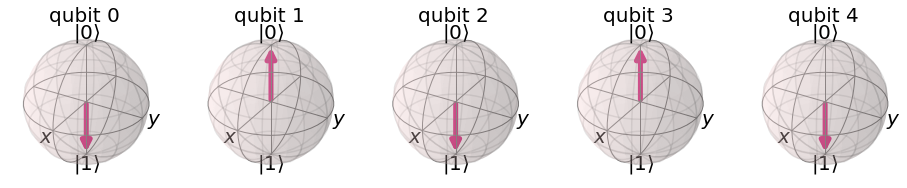

In [63]:
#qc = qc_lesson(True, False, True) # score = 239
qc = qc_reddit(True, False, True) # score = 170
#qc = qc_pfag(True, False, True) # score = 166, but inconsistent 
#qc = qc_textbook(True, False, True) # score = n/a... inefficient 

# execute the circuit by qasm_simulator / statevector_simulator
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

In [37]:
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc_reddit_opt)

Computing cost...
Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 150.
Feel free to submit your answer.


In [9]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex1a
submit_ex1a(qc_reddit_opt)

Computing cost...
Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.


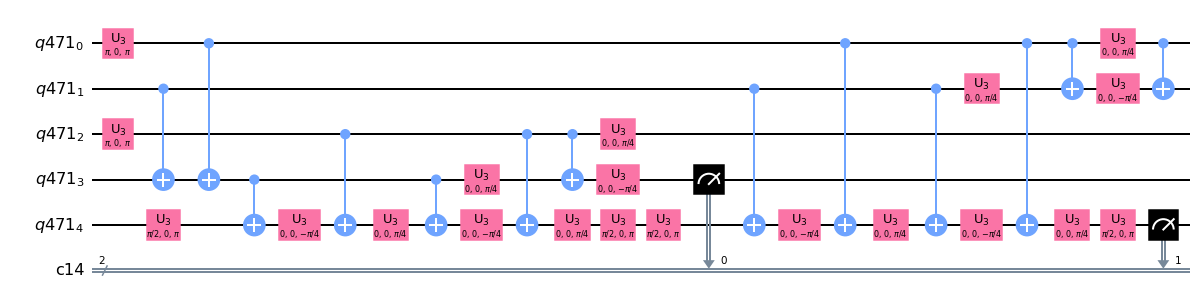

In [40]:
qc_reddit_opt.draw()